In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from cvxopt import matrix

In [2]:
## Problem 2
A = np.matrix([[1, 2, 1], [2, 1, 1], [1, 1, 2]])
# Characteristic Polynomial, Eigenvalues, Eigenvectors
poly = np.poly(A)
eigenvalues, eigenvectors = np.linalg.eig(A)
print(f"The characteristic polynomial coefficient array is: {poly}")
print(f"\nThe eigenvalues are: {eigenvalues}")
print(f"\nThe eigenvectors are: \n {eigenvectors}")
# Orthonormal and Diagonal Matrix
P = eigenvectors
D = np.diag(eigenvalues)
A = P @ D @ np.linalg.inv(P)
print(f"\nThe diagonalization theorem holds true since \n {A} \n is verified to be the same as A")
# Invertiblity
determinant = np.linalg.det(A)
print(f"\nThe determinant of A is: \n {determinant} \n Because this is not 0, A is invertible")
A_inverse = P @ np.linalg.inv(D) @ np.linalg.inv(P)
print(f"\nUsing the expression in the code above, A inverse is \n {A_inverse}")
A_inverse_eigenvalues = np.linalg.eigvals(A_inverse)
print(f"\nThe eigenvalues for A inverse are \n {A_inverse_eigenvalues}")
# print(f"\n To verify this, we can see that \n {A @ A_inverse} \n yields us the identity matrix")

The characteristic polynomial coefficient array is: [ 1. -4. -1.  4.]

The eigenvalues are: [ 4. -1.  1.]

The eigenvectors are: 
 [[-5.77350269e-01 -7.07106781e-01 -4.08248290e-01]
 [-5.77350269e-01  7.07106781e-01 -4.08248290e-01]
 [-5.77350269e-01  1.04469048e-16  8.16496581e-01]]

The diagonalization theorem holds true since 
 [[1. 2. 1.]
 [2. 1. 1.]
 [1. 1. 2.]] 
 is verified to be the same as A

The determinant of A is: 
 -3.999999999999999 
 Because this is not 0, A is invertible

Using the expression in the code above, A inverse is 
 [[-0.25  0.75 -0.25]
 [ 0.75 -0.25 -0.25]
 [-0.25 -0.25  0.75]]

The eigenvalues for A inverse are 
 [-1.    0.25  1.  ]


In [3]:
## Problem 3
# Show that the function is convex
def f(x):
    return x[0]**4 + (x[0] + x[1])**2 + (x[0] + x[2])**2

guess = np.ones(3)
hessian = np.linalg.inv(optimize.minimize(f, guess).hess_inv)
print(f"Here is the Hessian for the function above: \n {hessian}")
print(" Because all the values for the Hessian are positive, it is positive definite meaning the function is convex.")

# Find the extrema of the function
def f(x):
    return x[0]**2 + (x[0] + x[1])**2 + (x[0] + x[2])**2

guess = np.zeros(3)

minimum_y = round(optimize.minimize(f, guess).fun, 3)
minimum_x = [int(x) for x in np.around(optimize.minimize(f, guess).x, 3)]
minimum = ((minimum_x[0], minimum_x[1], minimum_x[2]), int(minimum_y))
print(f'\nThe extrema for this function is: \n{minimum}')

Here is the Hessian for the function above: 
 [[4.05443481 2.02542757 2.02542752]
 [2.02542757 1.51271379 0.51271379]
 [2.02542752 0.51271379 1.51271379]]
 Because all the values for the Hessian are positive, it is positive definite meaning the function is convex.

The extrema for this function is: 
((0, 0, 0), 0)


In [4]:
## Problem 4
# Solve the function using the optimizer for part 4.1
def objective(x):
    return x[0] + x[1] + (2*x[2])**2

constraints = ({"type":"eq", "fun": lambda x: x[0] - 1},
               {"type":"eq", "fun": lambda x: x[0]**2 + x[1]**2 - 1})

guess = np.zeros(3)
optimization = optimize.minimize(objective, guess, method = "SLSQP", constraints = constraints)
minimum_y = round(optimization.fun, 3)
minimum_x = [int(x) for x in np.around(optimization.x, 3)]
minimum = ((minimum_x[0], minimum_x[1], minimum_x[2]), int(minimum_y))
print(f'\nThe solution for this functionin 4.1 is: \n{minimum}')

# Solve the function using the optimizer for part 4.2 when the constraint is 1
def objective(x):
    return 2*x[0]**2 + x[1]**2

constraints = ({"type":"eq", "fun": lambda x: x[0] + x[1] - 1})

guess = np.zeros(2)
optimization = optimize.minimize(objective, guess, method = "SLSQP", constraints = constraints)
minimum_y = round(optimization.fun, 3)
minimum_x = np.around(optimization.x, 3)
minimum = ((minimum_x[0], minimum_x[1]), minimum_y)
print(f'\nThe solution for this function in 4.2 when the constraint is 1 is: \n{minimum}')

# Solve the function using the optimizer for part 4.2 when the constraint is 1.05
def objective(x):
    return 2*x[0]**2 + x[1]**2

constraints = ({"type":"eq", "fun": lambda x: x[0] + x[1] - 1.05})

guess = np.zeros(2)
optimization = optimize.minimize(objective, guess, method = "SLSQP", constraints = constraints)
minimum_y = round(optimization.fun, 3)
minimum_x = np.around(optimization.x, 3)
minimum = ((minimum_x[0], minimum_x[1]), minimum_y)
print(f'\nThe solution for this function in 4.2 when the constraint is 1.05 is: \n{minimum}')
print(f"\nThe optimal value for this changes by +{round(0.735-0.667, 4)} when the constraint changes from 1 to 1.05")



The solution for this functionin 4.1 is: 
((1, 0, 0), 1)

The solution for this function in 4.2 when the constraint is 1 is: 
((0.333, 0.667), 0.667)

The solution for this function in 4.2 when the constraint is 1.05 is: 
((0.35, 0.7), 0.735)

The optimal value for this changes by +0.068 when the constraint changes from 1 to 1.05


The weights for the global min variance portfolio are:
 [ 0.00348594 -0.00843175  0.00071952]

The weights for the targeted min variance portfolio with target rho_1 are:
 [ 0.82309695 -0.0930379   0.26994095]

The weights for the targeted min variance portfolio with target (rho_2 + rho_3) / 2 are:
 [0.22965758 0.62078287 0.14955955]

 The optimal weights for the positions using the two fund theorem is: 
 [[ 0.76525268]
 [-0.0234597 ]
 [ 0.25820702]]
[ 1.00e-02  2.00e-03  1.00e-03]
[ 2.00e-03  1.10e-02  3.00e-03]
[ 1.00e-03  3.00e-03  2.00e-02]

[ 1.00e-02  2.00e-03  1.00e-03]
[ 2.00e-03  1.10e-02  3.00e-03]
[ 1.00e-03  3.00e-03  2.00e-02]

[ 1.00e-02  2.00e-03  1.00e-03]
[ 2.00e-03  1.10e-02  3.00e-03]
[ 1.00e-03  3.00e-03  2.00e-02]



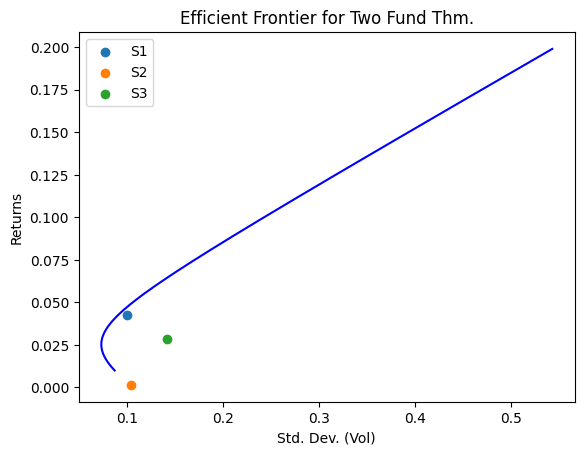

In [55]:
## Problem 6
sigma = matrix([[0.010, 0.002, 0.001],[0.002, 0.011, 0.003],[0.001, 0.003, 0.020]])
rho = matrix([0.0427, 0.0015, 0.0285])

# Global minimum variance portfolio function
def global_port(Q):
    
    def objective(weights):
        return weights@Q@weights.T
    
    guess = np.ones((3, 1)) * (1.0/3.0)
    optimization = optimize.minimize(objective, guess, method = "SLSQP")
    return optimization.x

global_min_variance_weights = global_port(Q = sigma)

print(f"The weights for the global min variance portfolio are:\n {global_min_variance_weights}")
 
# Minimum Variance Portfolio with targeted return function
def targeted_port(rho, Q, targeted_rho):
    
    def objective(weights):
        return weights@Q@weights.T
    
    constraints = ({"type":"eq", "fun": lambda x: np.sum(x) - 1},
                   {"type":"eq", "fun": lambda x: targeted_rho - x.T@rho})
    guess = np.ones((3, 1)) * (1.0/3.0)
    optimization = optimize.minimize(objective, guess, method = "SLSQP", constraints=constraints)
    return optimization.x

# Minimum Variance Portfolio with targeted return of rho_1
target1 = rho[0]
targeted_min_variance_weights_1 = targeted_port(rho, sigma, target1)
print(f"\nThe weights for the targeted min variance portfolio with target rho_1 are:\n {targeted_min_variance_weights_1}")

# Minimum Variance Portfolio with targeted return of (rho_2 + rho_3)/2
target2 = (rho[1] + rho[2])/2
targeted_min_variance_weights_2 = targeted_port(rho, sigma, target2)
print(f"\nThe weights for the targeted min variance portfolio with target (rho_2 + rho_3) / 2 are:\n {targeted_min_variance_weights_2}")

# Two Fund Theorem with Expected Return of 4%
def two_fund(r):
    p2_weight = (r - target1)/(target2 - target1)
    p1_weight = 1 - p2_weight
    two_fund_weights = p1_weight * targeted_min_variance_weights_1 + p2_weight * targeted_min_variance_weights_2
    two_fund_weights = two_fund_weights.reshape(3, 1)
    return two_fund_weights

two_fund_weights = two_fund(0.04)    
print(f"\n The optimal weights for the positions using the two fund theorem is: \n {two_fund_weights}")

# Generate an efficient frontier for the mean variance portfolio using the two fund theorem
def frontier(rho, Q, color='blue'):
    # Create tau values to use for the frontier
    r_seq = np.arange(0.01, 0.2, 0.001)
    
    port_rets = []
    port_risks = []
    
    for r in r_seq:
        weights = two_fund(r)
        rets = (weights.T.dot(rho)).sum()
        risks = weights.T.dot((np.matrix(Q).dot(weights)).reshape(len(rho), 1)).sum()
        port_rets.append(rets) 
        port_risks.append(risks)
    
    for i in range(len(rho)):
        print(Q)
        stock_variance = np.sqrt(Q[i,i])
        stock_return = rho[i]
        plt.scatter(stock_variance, stock_return, label = f"S{i+1}")
    
    plt.plot(np.sqrt(port_risks), port_rets, color = color)
    plt.xlabel("Std. Dev. (Vol)")
    plt.ylabel("Returns")
    plt.title("Efficient Frontier for Two Fund Thm.")
    plt.legend()
    
    return None

frontier(rho, sigma, 'blue')

